# **INSTALLING ALL THE REQUIRED LIBRARIES**

# IMPORTING ALL THE REQUIRED LIBRARIES

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import imutils

In [6]:
import easyocr

ModuleNotFoundError: No module named 'bidi.algorithm'

# Reading the Image

In [16]:
from google.colab import files
uploaded = files.upload()

img = cv2.imread('test.jpg')
print(img)

ModuleNotFoundError: No module named 'google.colab'

# Converting the Image into the GRAY Scale FORMAT

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [1]:
plt.imshow(gray)

NameError: name 'plt' is not defined

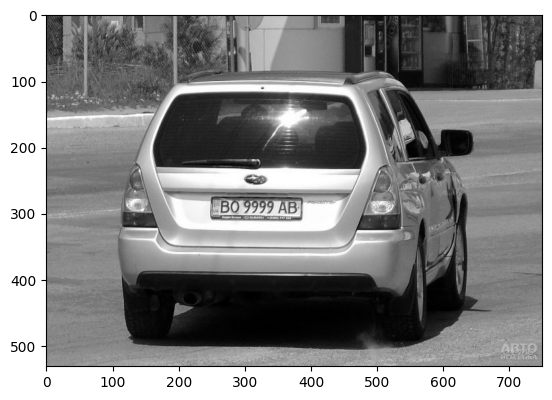

In [19]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# APPLYING FILTERING TO REMOVE THE NOISE FROM THE IMAGE, ALONG WITH THE EDGE DETECTION, WHICH ENABLES US TO FIND EDGES WITH IN THE IMAGE

In [20]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [21]:
edged = cv2.Canny(bfilter, 30, 200)

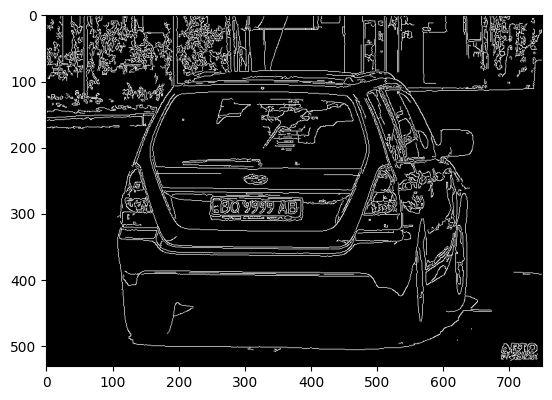

In [22]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [23]:
#  cv.CHAIN_APPROX_NONE gives (734 points) and  with cv.CHAIN_APPROX_SIMPLE (only 4 points)

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [24]:
# Simplifies how contonours are actually returned
contours = imutils.grab_contours(keypoints)

In [25]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [26]:
print(contours)

[array([[[245, 117]],

       [[244, 118]],

       [[226, 118]],

       ...,

       [[395, 118]],

       [[367, 118]],

       [[366, 117]]], dtype=int32), array([[[244, 118]],

       [[245, 117]],

       [[366, 117]],

       [[367, 118]],

       [[395, 118]],

       [[396, 119]],

       [[412, 119]],

       [[413, 120]],

       [[427, 120]],

       [[428, 121]],

       [[439, 121]],

       [[440, 122]],

       [[451, 122]],

       [[452, 123]],

       [[454, 123]],

       [[463, 132]],

       [[463, 133]],

       [[464, 134]],

       [[464, 135]],

       [[465, 136]],

       [[465, 137]],

       [[466, 138]],

       [[466, 139]],

       [[467, 140]],

       [[467, 142]],

       [[468, 143]],

       [[468, 145]],

       [[469, 146]],

       [[469, 148]],

       [[470, 149]],

       [[470, 151]],

       [[471, 152]],

       [[471, 153]],

       [[472, 154]],

       [[472, 155]],

       [[473, 156]],

       [[473, 158]],

       [[474, 159]],

    

In [27]:
location = None

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [28]:
print(location)

[[[249 278]]

 [[381 276]]

 [[388 303]]

 [[251 310]]]


In [29]:
mask = np.zeros(gray.shape, np.uint8)

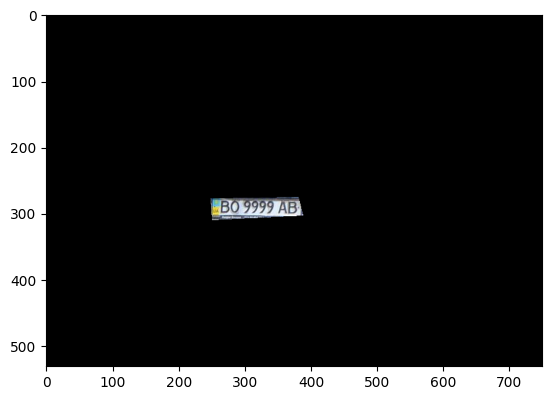

In [30]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

new_image = cv2.bitwise_and(img, img, mask = mask)


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [31]:
(x, y) = np.where(mask == 255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))

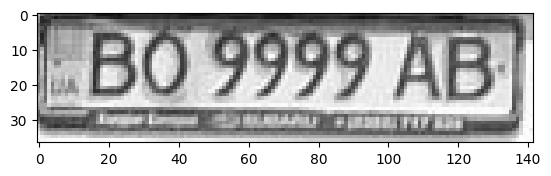

In [32]:
cropped_image = gray[x1:x2+3, y1:y2+3]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [33]:
reader = easyocr.Reader(['en'])

result = reader.readtext(cropped_image)

print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

[([[12, 2], [136, 2], [136, 30], [12, 30]], "BO 9999 AB'", 0.4139737543114564)]


In [34]:
print(result[0][0])

[[12, 2], [136, 2], [136, 30], [12, 30]]


In [35]:
print(result[0][1])

BO 9999 AB'


In [36]:
text = result[0][1]

font = cv2.FONT_HERSHEY_SIMPLEX

In [38]:
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)

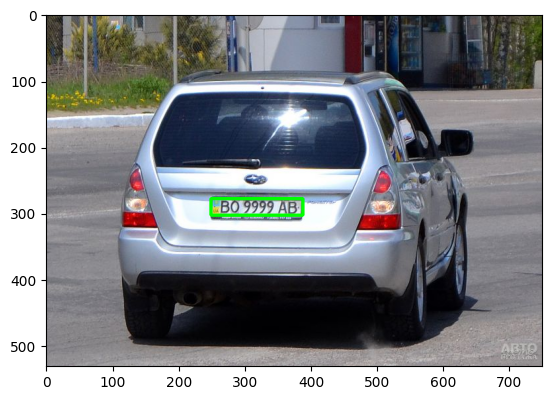

In [37]:
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))